In [71]:
import pandas as pd
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tvshow_edges.csv")
df.head(10)

,node_1,node_2
0,0,1838
1,0,1744
2,0,14
3,0,2543
4,1,1009
5,1,1171
6,1,1465
7,1,2069
8,1,2080
9,1,1856


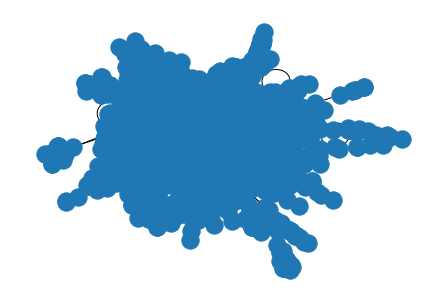

In [3]:
#tạo đồ thị sử dụng node_1 và node_2 cho các connections
G = nx.from_pandas_edgelist(df, 'node_1', 'node_2')
nx.draw(G)

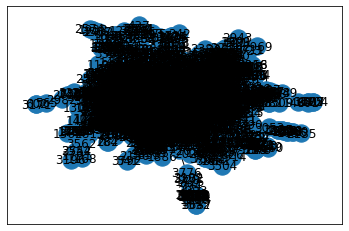

In [4]:
#trực quan hóa mạng vừa xây dựng
nx.draw_networkx(G)

In [6]:
G.edges()

EdgeView([(0, 1838), (0, 1744), (0, 14), (0, 2543), (1838, 2013), (1838, 2714), (1744, 1073), (1744, 1318), (1744, 2543), (1744, 2714), (14, 2082), (14, 180), (14, 2938), (2543, 1318), (2543, 2013), (2543, 3016), (2543, 2714), (1, 1009), (1, 1171), (1, 1465), (1, 2069), (1, 2080), (1, 1856), (1, 3799), (1, 1033), (1, 2717), (1, 300), (1, 1603), (1, 942), (1, 3678), (1, 952), (1, 815), (1009, 1033), (1009, 3245), (1009, 942), (1009, 815), (1009, 1171), (1009, 1465), (1009, 3185), (1009, 2069), (1009, 3799), (1009, 2717), (1009, 1603), (1171, 1033), (1171, 3351), (1171, 807), (1171, 942), (1171, 1024), (1171, 1465), (1171, 2455), (1171, 3185), (1171, 2069), (1171, 2080), (1171, 2682), (1171, 3799), (1171, 3138), (1171, 2717), (1171, 1603), (1171, 2751), (1171, 3678), (1171, 815), (1465, 1033), (1465, 299), (1465, 300), (1465, 508), (1465, 3351), (1465, 942), (1465, 952), (1465, 1080), (1465, 1082), (1465, 815), (1465, 2069), (1465, 2080), (1465, 3799), (1465, 1603), (1465, 2717), (1465, 

In [49]:
print('number_of_nodes: ' + str(G.number_of_nodes()))
print('number_of_edges: ' + str(G.number_of_edges()))

number_of_nodes: 3892
number_of_edges: 17262


In [11]:
#Degree node 1
nx.degree(G, 1)

15

<h2>Network characteristics</h2>

<h3>Degree Distribution</h3>

In [23]:
def degree_distribution() :
    degs = {}
    for n in G.nodes() :
        deg = G.degree(n)
        if deg not in degs :
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    return items

In [63]:
items = degree_distribution()
print(items)

[(1, 607), (2, 525), (3, 421), (4, 356), (5, 271), (6, 221), (7, 182), (8, 139), (9, 112), (10, 122), (11, 95), (12, 98), (13, 71), (14, 50), (15, 45), (16, 47), (17, 41), (18, 36), (19, 40), (20, 32), (21, 25), (22, 27), (23, 31), (24, 20), (25, 20), (26, 14), (27, 13), (28, 14), (29, 14), (30, 11), (31, 8), (32, 10), (33, 10), (34, 7), (35, 10), (36, 7), (37, 9), (38, 3), (39, 1), (40, 3), (41, 4), (42, 3), (43, 2), (44, 1), (45, 7), (46, 6), (47, 4), (48, 1), (49, 2), (51, 2), (52, 1), (53, 3), (55, 1), (56, 3), (57, 4), (58, 4), (59, 1), (60, 1), (61, 2), (62, 4), (63, 12), (64, 17), (65, 6), (66, 2), (67, 3), (69, 2), (70, 2), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (79, 2), (81, 1), (86, 1), (89, 1), (94, 1), (95, 2), (97, 2), (100, 2), (101, 1), (102, 1), (104, 1), (108, 1), (126, 2)]


Text(0.5, 1.0, 'Degree Distribution')

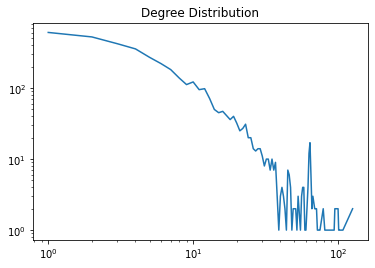

In [24]:
items = degree_distribution()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot ([k for (k,v) in items] , [v for (k,v) in items])
ax.set_xscale ('log')
ax.set_yscale ( 'log')
plt.title("Degree Distribution")

Text(0, 0.5, 'number of nodes')

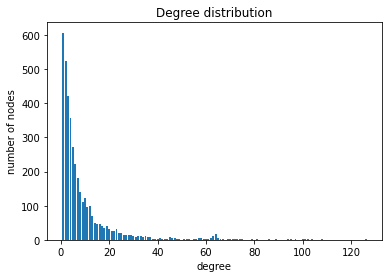

In [28]:
items = degree_distribution()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar ([k for (k,v) in items] , [v for (k,v) in items])
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

<h3>Path distance Distribution</h3>

In [31]:
#đường đi ngắn nhất từ node 1 đến node 10
nx.shortest_path(G, 1, 10)

[1, 1033, 3845, 10]

<h3>Clustering Coefficient distribution</h3>

In [33]:
#Clustering Coefficient distribution
nx.clustering(G, 10)

0.5

In [34]:
#Average clustering coefficient
nx.average_clustering(G)

0.3737384324597403

<h2>Centrality measures</h2>

<h3>Degree centrality</h3>

In [37]:
nx.degree_centrality(G)

{0: 0.0010280133641737343,
 1838: 0.0007710100231303008,
 1744: 0.0012850167052171678,
 14: 0.0010280133641737343,
 2543: 0.0015420200462606015,
 1: 0.0038550501156515036,
 1009: 0.003084040092521203,
 1171: 0.005140066820868671,
 1465: 0.004883063479825238,
 2069: 0.0033410434335646366,
 2080: 0.004626060138781804,
 1856: 0.0033410434335646366,
 3799: 0.004112053456694937,
 1033: 0.004883063479825238,
 2717: 0.0033410434335646366,
 300: 0.004112053456694937,
 1603: 0.0033410434335646366,
 942: 0.003084040092521203,
 3678: 0.0025700334104343356,
 952: 0.00359804677460807,
 815: 0.004112053456694937,
 2: 0.0010280133641737343,
 3656: 0.00359804677460807,
 3459: 0.002827036751477769,
 1157: 0.003084040092521203,
 1993: 0.002827036751477769,
 3: 0.016705217167823184,
 386: 0.02081727062451812,
 2659: 0.024929324081213056,
 2160: 0.01644821382677975,
 1925: 0.014906193780519147,
 3511: 0.016705217167823184,
 372: 0.01644821382677975,
 1506: 0.018761243896170652,
 2303: 0.016191210485736313

<h3>Betweenness centrality</h3>

In [40]:
#betweenness_centrality cho node 1
nx.betweenness_centrality(G, 1)

{0: 0.0004240479786860509,
 1838: 0.0,
 1744: 0.0,
 14: 8.120067676966931e-05,
 2543: 0.0019217493502155074,
 1: 0.0,
 1009: 0.0,
 1171: 0.002401928907843131,
 1465: 4.59170493638011e-05,
 2069: 0.0,
 2080: 0.001236351124372821,
 1856: 0.0,
 3799: 0.0,
 1033: 0.00017448478758244417,
 2717: 0.0,
 300: 0.0006311507148915207,
 1603: 0.0,
 942: 0.0,
 3678: 0.0,
 952: 0.0,
 815: 0.0,
 2: 4.129751591265505e-05,
 3656: 0.0002139855493895592,
 3459: 0.0,
 1157: 0.0,
 1993: 0.0038947131654878,
 3: 0.0,
 386: 0.0002094485335343713,
 2659: 0.00751446807869108,
 2160: 0.0,
 1925: 0.0,
 3511: 0.0,
 372: 0.0,
 1506: 0.001211682012383206,
 2303: 0.0,
 1634: 0.0,
 1706: 0.0,
 3038: 0.017541247651423966,
 749: 0.0,
 2790: 0.0,
 452: 0.0,
 1936: 0.0,
 2915: 0.0,
 2972: 0.0,
 1100: 0.0,
 2918: 0.0,
 3026: 0.0,
 2406: 0.0,
 1673: 0.02348441022958231,
 11: 0.0,
 3156: 0.001742794681661471,
 2250: 0.0,
 2350: 0.0,
 1050: 0.0,
 1060: 0.0,
 1457: 0.0,
 3054: 0.0,
 72: 0.0,
 1553: 0.0,
 1114: 0.007962627153638

In [41]:
#betweenness_centrality cho tất cả các node 
nx.betweenness_centrality(G, normalized = True, endpoints = False)

{0: 0.0005332968915865053,
 1838: 4.523974209082263e-06,
 1744: 0.001425473746160989,
 14: 0.00020719777063356456,
 2543: 0.002024762796879503,
 1: 0.0008447089073148172,
 1009: 4.599281487469275e-05,
 1171: 0.006544967119341704,
 1465: 0.0008928383746989726,
 2069: 7.229809235307733e-05,
 2080: 0.0026518627354903236,
 1856: 0.01415660199215864,
 3799: 0.0002039332270148581,
 1033: 0.0030521201762721685,
 2717: 0.0016005847527548632,
 300: 0.003326881701299661,
 1603: 2.159630093830608e-05,
 942: 1.6227383590593339e-06,
 3678: 3.846673034503407e-07,
 952: 0.0022656959507429586,
 815: 0.0006490564313566535,
 2: 1.2362061615522192e-05,
 3656: 0.0005700611721782566,
 3459: 0.000640196447790212,
 1157: 0.0007127974789819849,
 1993: 0.0021498549761330833,
 3: 0.0001942842977306413,
 386: 0.0005860944737175593,
 2659: 0.012715118848705574,
 2160: 0.00018578421158684327,
 1925: 5.10324327375834e-05,
 3511: 0.00010213014602533454,
 372: 4.880395364366018e-06,
 1506: 0.012576529606527267,
 2303

<h3>Closeness centrality</h3>

In [42]:
nx.closeness_centrality(G)

{0: 0.16224668501376033,
 1838: 0.1396325270939496,
 1744: 0.18095991070598083,
 14: 0.15441701722358916,
 2543: 0.17989736002589116,
 1: 0.19963059873787903,
 1009: 0.18714828531576164,
 1171: 0.21778797716332698,
 1465: 0.1931688427741647,
 2069: 0.1904738594086548,
 2080: 0.20911484925028215,
 1856: 0.21742288779615557,
 3799: 0.19174099443157738,
 1033: 0.21100867678958785,
 2717: 0.19207226774607564,
 300: 0.1901759530791789,
 1603: 0.18788025108643167,
 942: 0.18787117956641397,
 3678: 0.1871302842302698,
 952: 0.20135582695094184,
 815: 0.19279556040035675,
 2: 0.18284774436090226,
 3656: 0.19546870290364715,
 3459: 0.18243623405851464,
 1157: 0.19802534480126216,
 1993: 0.20864389511501957,
 3: 0.21197428633689258,
 386: 0.2105405551647638,
 2659: 0.21877987067753726,
 2160: 0.2119627390096421,
 1925: 0.2095879342849448,
 3511: 0.21084859651024168,
 372: 0.20981396602857913,
 1506: 0.21937193437447144,
 2303: 0.20980265286315108,
 1634: 0.20980265286315108,
 1706: 0.20981396602

<h3>Eigenvector</h3>

In [43]:
nx.eigenvector_centrality(G)

{0: 3.386591811057391e-05,
 1838: 1.076898013628995e-06,
 1744: 0.002124646278011342,
 14: 5.313310873571102e-07,
 2543: 4.1820558157043136e-05,
 1: 2.5867941951583966e-06,
 1009: 5.074916129033432e-07,
 1171: 1.795343751038598e-05,
 1465: 9.550758333453341e-07,
 2069: 7.216059877647648e-07,
 2080: 5.347099958281082e-06,
 1856: 0.00012307253360496892,
 3799: 7.521061992749859e-07,
 1033: 6.250270062581335e-06,
 2717: 6.825085508392059e-07,
 300: 9.71639659272623e-07,
 1603: 5.95029514655786e-07,
 942: 5.902237886150925e-07,
 3678: 4.995826795314016e-07,
 952: 5.442161436633434e-06,
 815: 7.416200614806959e-07,
 2: 7.199238910308234e-06,
 3656: 4.3087486038379685e-05,
 3459: 4.266759696421791e-06,
 1157: 2.3320356100117144e-05,
 1993: 0.00038927624971261775,
 3: 0.12134228877028119,
 386: 0.13013172568734882,
 2659: 0.13690301421138854,
 2160: 0.12049354746954662,
 1925: 0.10967990303858932,
 3511: 0.120520119232816,
 372: 0.12082540723343897,
 1506: 0.12065048724357381,
 2303: 0.119172

<h3>PageRank</h3>

In [50]:
nx.pagerank(G, alpha = 0.8)

{0: 0.00023904565823421433,
 1838: 0.00020046739476427435,
 1744: 0.0002467352668531953,
 14: 0.0002652835679984471,
 2543: 0.00030953711272229637,
 1: 0.00036249942858630107,
 1009: 0.000303518371199312,
 1171: 0.000483362402476664,
 1465: 0.0004834241916736968,
 2069: 0.0003185474468592526,
 2080: 0.00045741273820115676,
 1856: 0.0004089001372984152,
 3799: 0.00039143904274754524,
 1033: 0.0004888800376924027,
 2717: 0.0003334941472604259,
 300: 0.0005285348500914317,
 1603: 0.0003158800640265471,
 942: 0.0002900325140102898,
 3678: 0.00024893268240990424,
 952: 0.0003662116036519984,
 815: 0.0003934741803391208,
 2: 0.00012845515896238387,
 3656: 0.0003287551302093498,
 3459: 0.00027637178819941267,
 1157: 0.000284572656459755,
 1993: 0.00026487798295101605,
 3: 0.0003791444997005984,
 386: 0.0005045866337853364,
 2659: 0.0007001148771433565,
 2160: 0.00037383655440177823,
 1925: 0.0003470217694400229,
 3511: 0.00038655675191932143,
 372: 0.0003685390668390632,
 1506: 0.000625743990

<h2>Community Detection</h2>

<h3>The Girvan-Newman betweenness method for graph partition</h3>

In [111]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [117]:
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  1

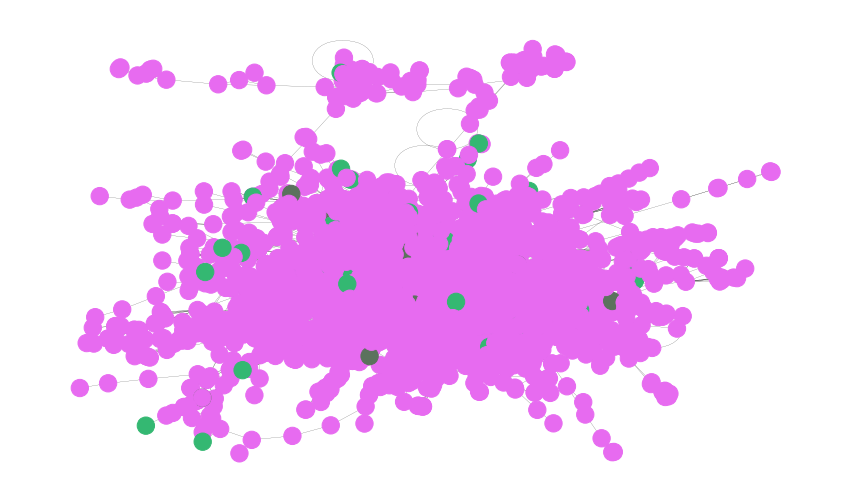

In [118]:
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in node_groups:
    color = "#%06X" % random.randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(G, with_labels=False, width=0.15, node_color=colors)

<h3>Girvan-Newman kết hợp pp breadth-first search</h3>

In [89]:
# đầu tiên tìm các giá trị Edge Betweenness Efficiently cho tất cả các cạnh và sau đó loại bỏ cạnh có giá trị lớn nhất

def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

  # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [91]:
#phân vùng biểu đồ thành nhiều cộng đồng
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [92]:
#TV-Shows Facebook Page-Page Graph

# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [102]:
print(node_groups)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223

In [104]:
import random

In [106]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in node_groups:
    color = "#%06X" % random.randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

2

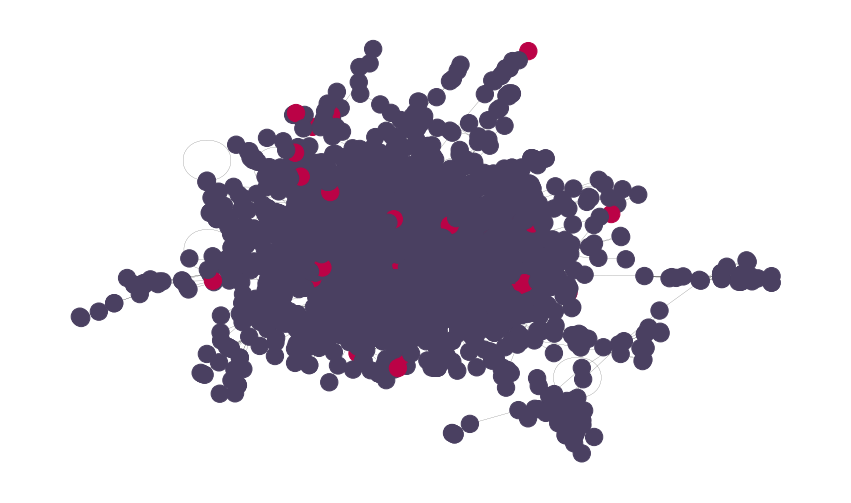

In [108]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(G, with_labels=False, width=0.15, node_color=colors)